# Comparison using user input to select two states/territories

In [2]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [31]:
#import data from StatesCleaned.csv
states_data = pd.read_csv('StatesCleaned.csv')
states_data = states_data.drop('Unnamed: 0',axis=1)
states_data.head()

,State,Population,Vaccination Ratio,Weekly New Cases (per 100k),Infection Rate,Cases,Deaths,Hospital Beds,Covid ICU Usage
0,AK,731545,0.725,54.3,1.04,300238,1390,1860.0,35.0
1,AL,4903185,0.647,85.4,1.15,1546720,21129,13416.0,310.0
2,AR,3017804,0.694,115.1,1.23,970396,12587,7367.0,287.0
3,AZ,7278717,0.767,178.4,1.26,2336206,31751,15059.0,1113.0
4,CA,39512223,0.840,128.7,1.22,11540816,99932,63802.0,4540.0


In [62]:
#ask user for which two states to compare and which metric to compare
state1 = input("Enter the two-letter abbreviation of the first state you'd like to compare: ")
state2 = input("Enter the two-letter abbreviation of the second state you'd like to compare: ")

#select column name using user input
metrics_list = ''
index = 1
for metric_name in states_data.columns[2:]:
    metrics_list = metrics_list+str(index)+': '+str(metric_name)+',\n' 
    index+=1
metric_index = input(f"Select the metric (type the number) you'd like to compare {state1} and {state2} on: "+metrics_list)
column_name = states_data.columns[int(metric_index)+1]

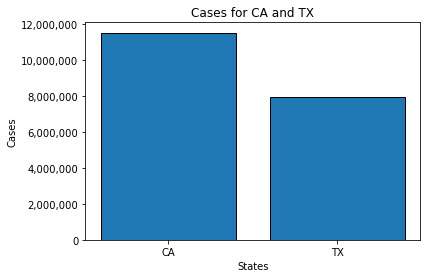

In [75]:
#access the requested data in the dataframe and present it in a dual bar graph
x = [state1, state2]
#states_data.loc[states_data['State']==state1][states_data.columns[int(metric_index)+1]].values[0]
y = [states_data.loc[states_data['State']==state1][column_name].values[0],states_data.loc[states_data['State']==state2][column_name].values[0]]

#create visualization and set attributes
plt.figure(facecolor='white')
plt.bar(x,y,edgecolor='black')
plt.xlabel('States')
plt.ylabel(column_name)
initial_yticks = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in initial_yticks])
plt.title(f'{column_name} for {state1} and {state2}')
plt.show()

In [76]:
#compare ALL metrics for chosen states
x = [state1, state2]
y = [states_data.loc[states_data['State']==state1][column_name].values[0],states_data.loc[states_data['State']==state2][column_name].values[0]]

#create visualization and set attributes
plt.subplots()
plt.figure(facecolor='white')
plt.bar(x,y,edgecolor='black')
plt.xlabel('States')
plt.ylabel(column_name)
initial_yticks = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in initial_yticks])
plt.title(f'{column_name} for {state1} and {state2}')
plt.show()